In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()


df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 951
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 951
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values: 951
Percentage of abnormal values: 10.00%

TOTAL INCONSISTENCY PERCENTAGE
29.993692178301096

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precis

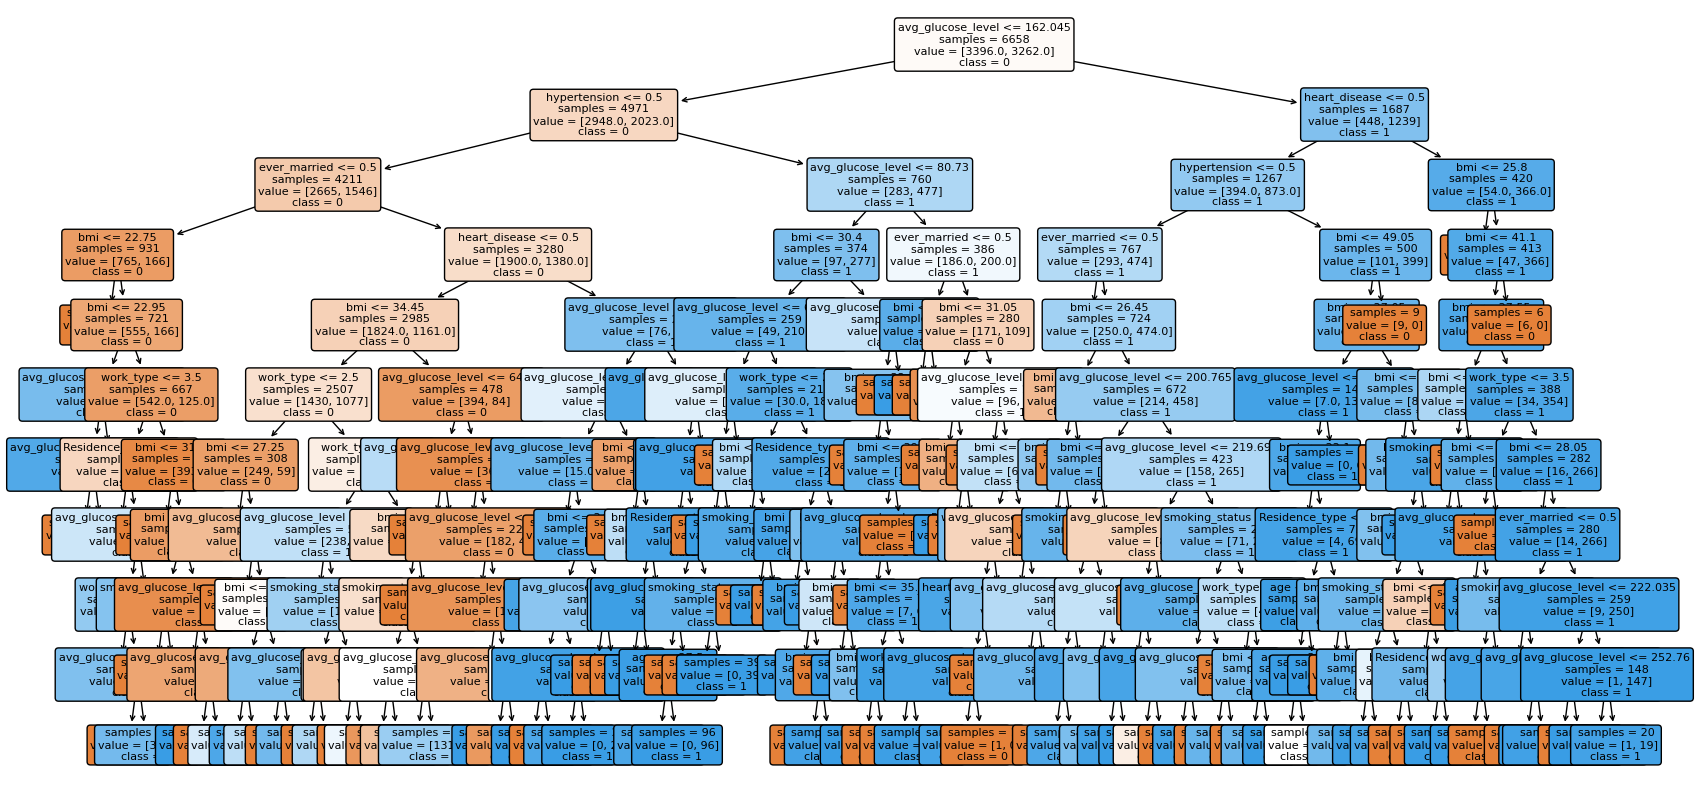

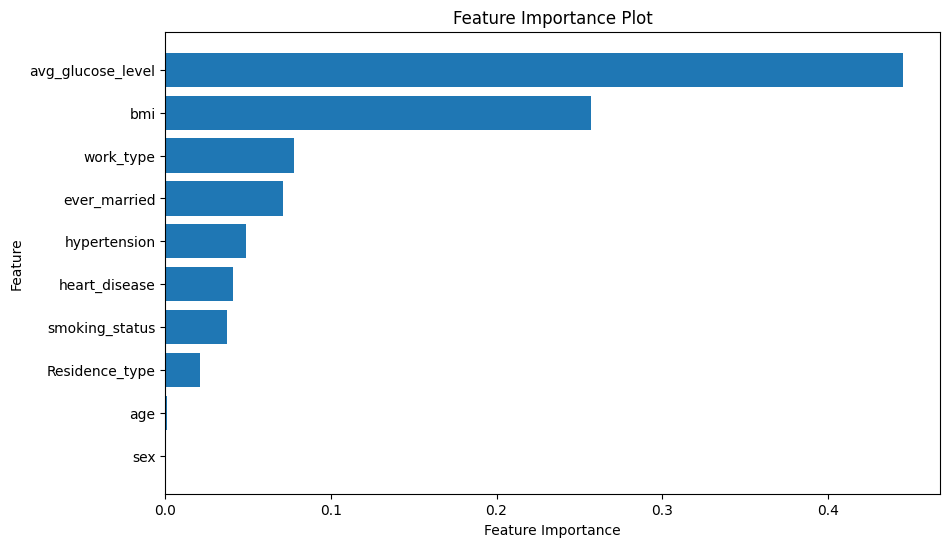

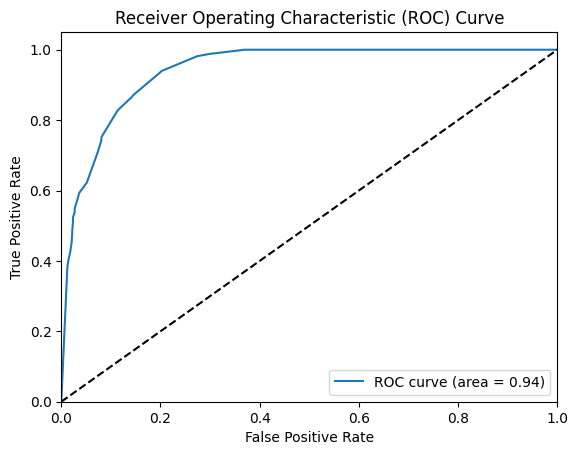

AUC Score: 0.9420153300398353


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8076923076923077, 0.8356643356643356, 0.8216783216783217, 0.8216783216783217, 0.7929824561403509, 0.775438596491228, 0.8035087719298246, 0.8140350877192982, 0.7929824561403509, 0.8105263157894737]
Mean accuracy: 0.8076186970923812
95% confidence interval: (0.7951998797828703, 0.8200375144018921)


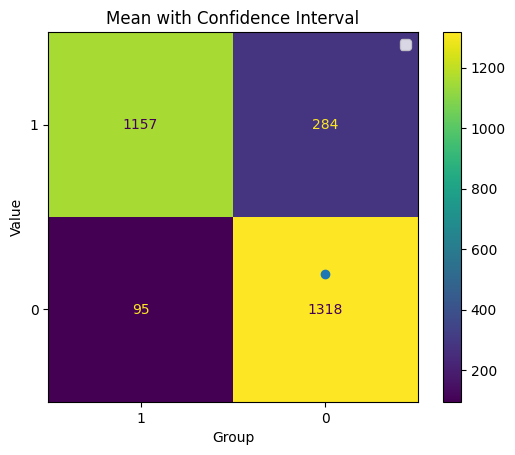


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



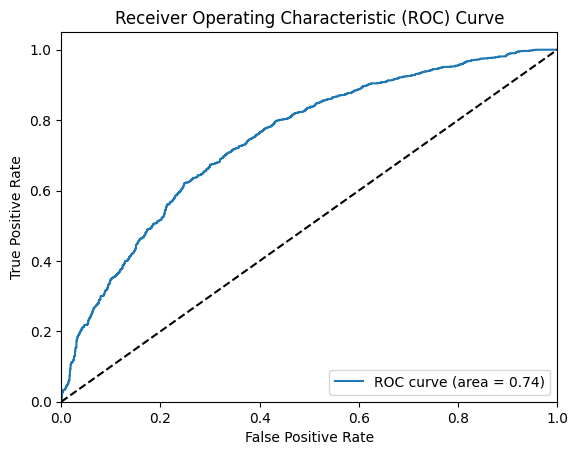

AUC Score: 0.744888963540201


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6608391608391608, 0.6538461538461539, 0.6958041958041958, 0.6433566433566433, 0.6736842105263158, 0.6666666666666666, 0.6736842105263158, 0.6421052631578947, 0.6736842105263158, 0.6175438596491228]
Mean accuracy: 0.6601214574898785
95% confidence interval: (0.6444372928818994, 0.6758056220978576)


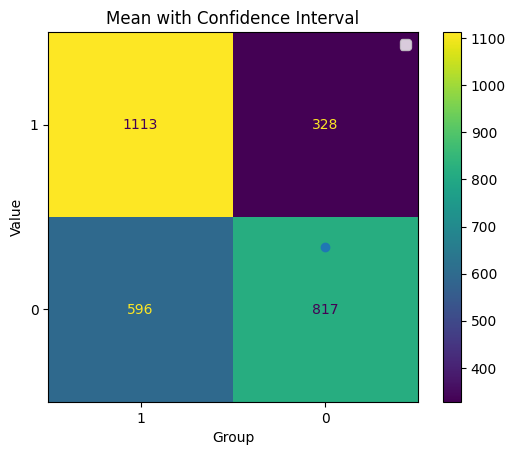


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 860
Percentage of inconsistencies in age and married features: 9.04%
Number of inconsistencies in age and workType features: 860
Percentage of inconsistencies in age and workType features: 9.04%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
18.08242220353238

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2853
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2853
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values: 2853
Percentage of abnormal values: 29.99%

TOTAL INCONSISTENCY PERCENTAGE
89.98107653490328

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:


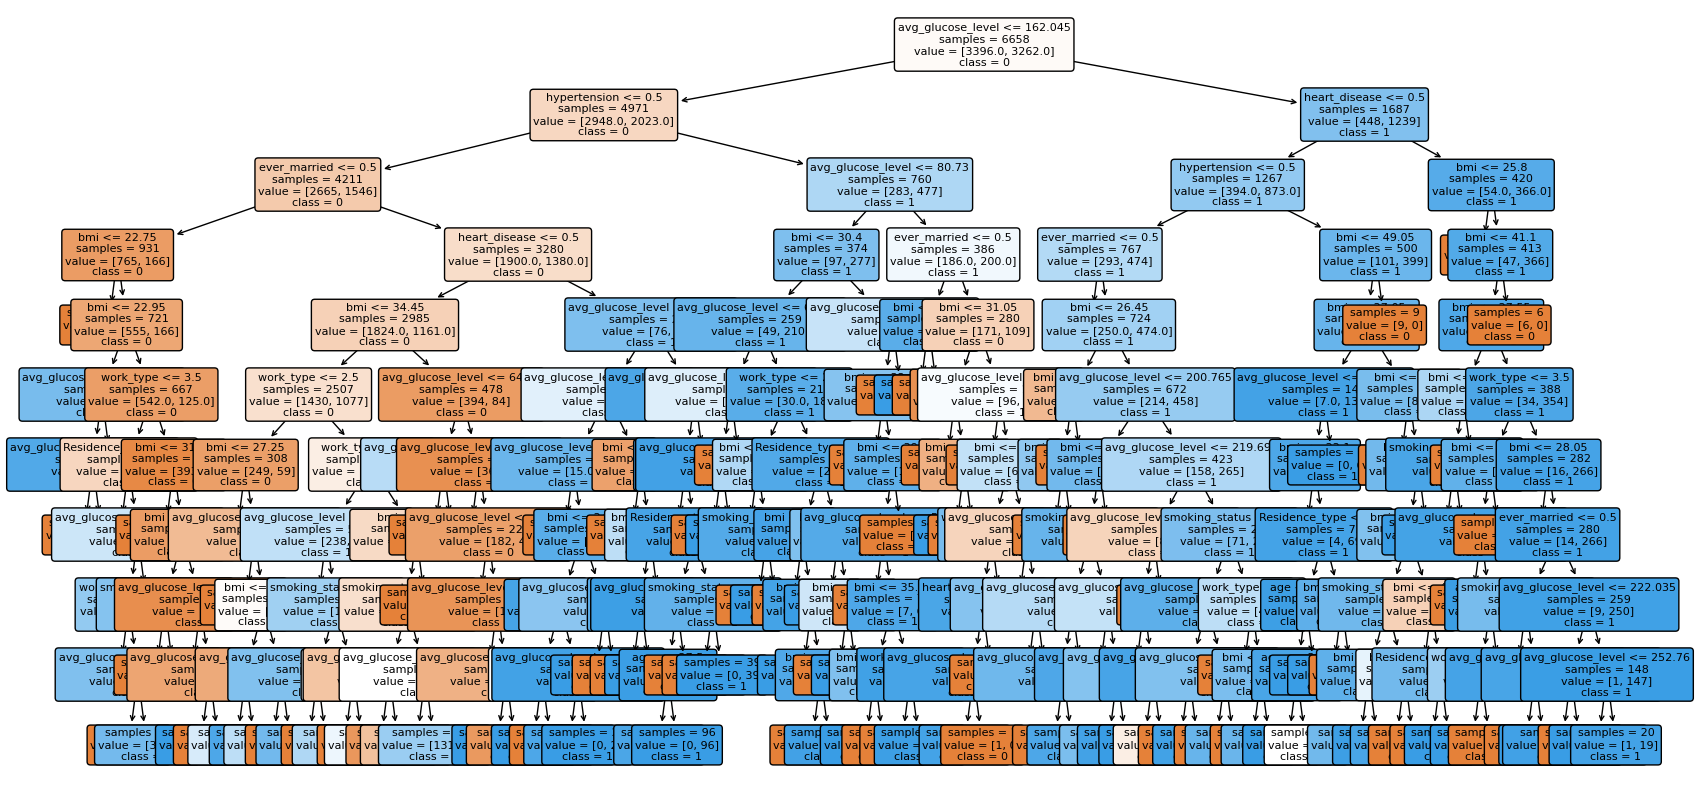

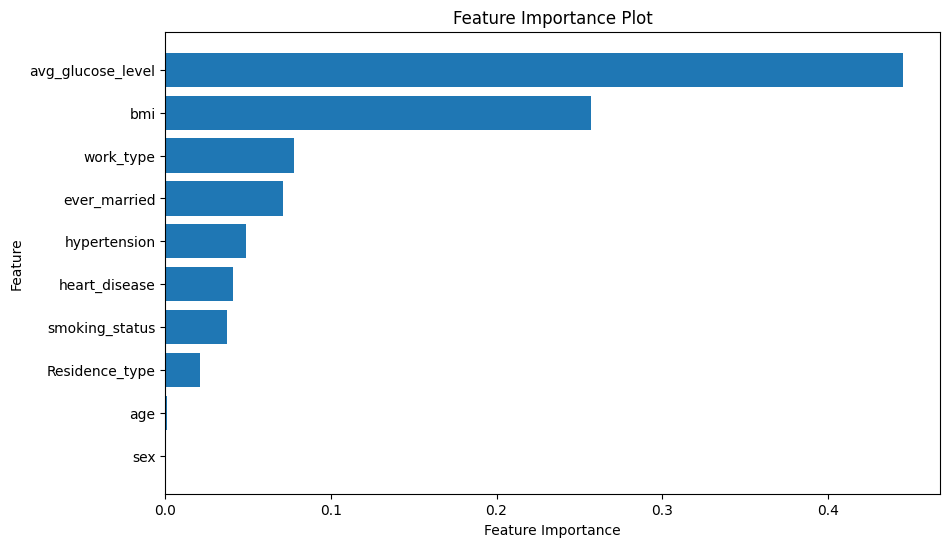

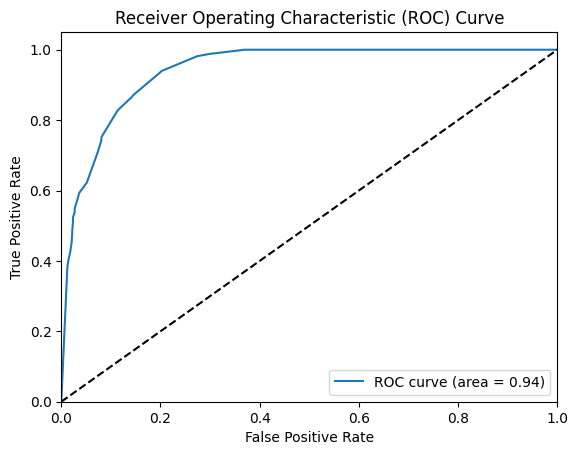

AUC Score: 0.9420153300398353


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7727272727272727, 0.8286713286713286, 0.8426573426573427, 0.7972027972027972, 0.7649122807017544, 0.8175438596491228, 0.8526315789473684, 0.8105263157894737, 0.8210526315789474, 0.8210526315789474]
Mean accuracy: 0.8128978039504355
95% confidence interval: (0.7928961687608802, 0.8328994391399909)


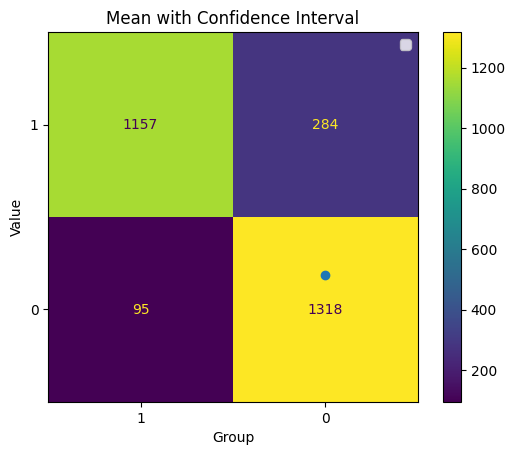


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



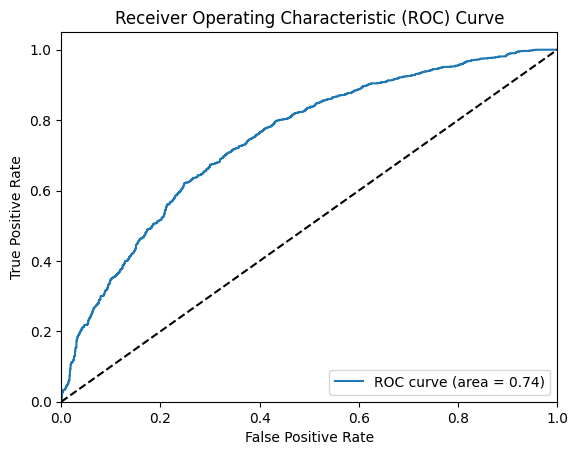

AUC Score: 0.744888963540201


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6573426573426573, 0.6748251748251748, 0.6258741258741258, 0.6748251748251748, 0.6385964912280702, 0.6701754385964912, 0.6350877192982456, 0.7298245614035088, 0.6035087719298246, 0.6771929824561403]
Mean accuracy: 0.6587253097779413
95% confidence interval: (0.6335580746869857, 0.683892544868897)


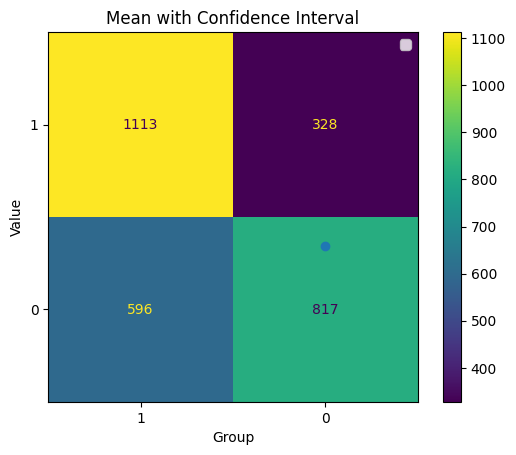


ORIGINAL VALUES RESTORED


In [3]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2556
Percentage of inconsistencies in age and married features: 26.87%
Number of inconsistencies in age and workType features: 2556
Percentage of inconsistencies in age and workType features: 26.87%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
53.74264087468461

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4756
Percentage of inconsistencies in age and married features: 50.00%
Number of inconsistencies in age and workType features: 4756
Percentage of inconsistencies in age and workType features: 50.00%
Number of abnormal values: 4756
Percentage of abnormal values: 50.00%

TOTAL INCONSISTENCY PERCENTAGE
150.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
        

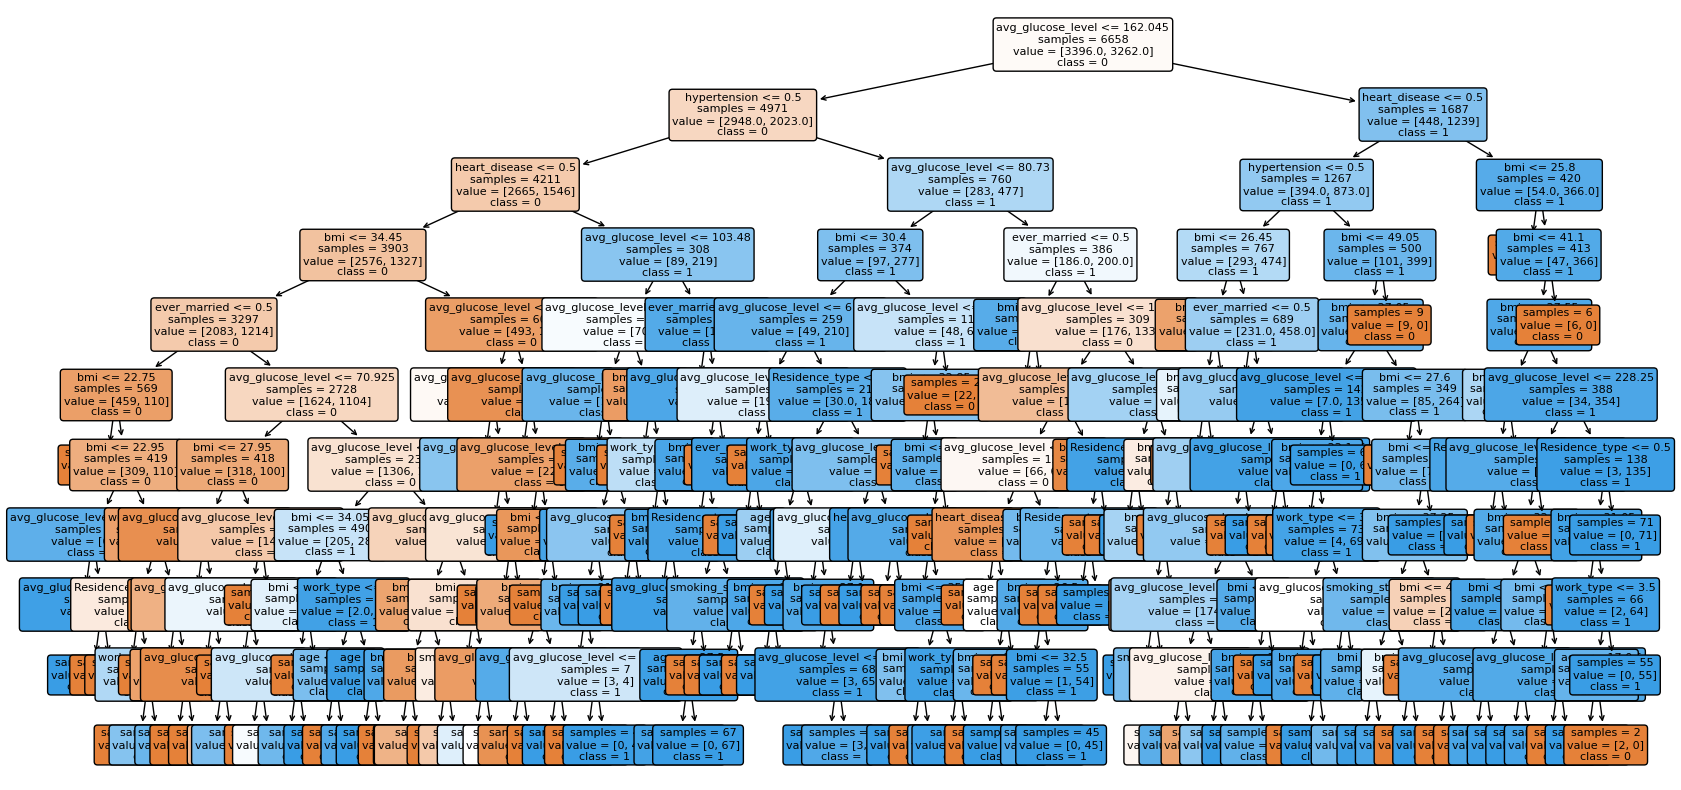

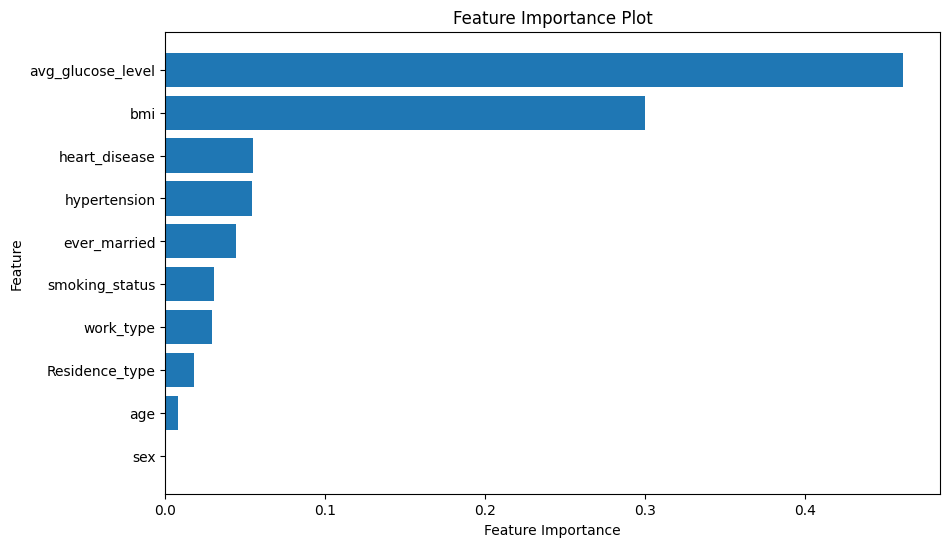

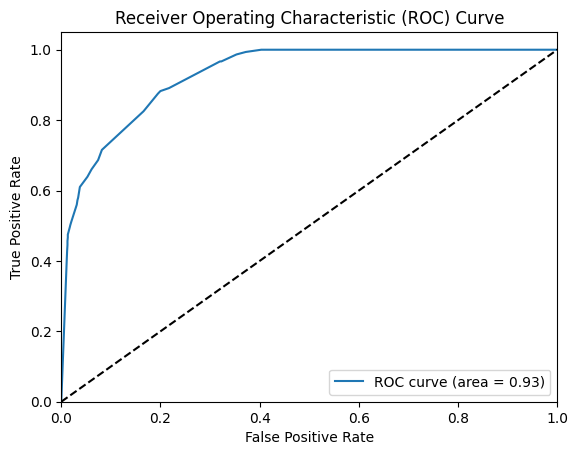

AUC Score: 0.9288784180601168


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7867132867132867, 0.7657342657342657, 0.8356643356643356, 0.8111888111888111, 0.7929824561403509, 0.8, 0.8210526315789474, 0.8140350877192982, 0.8175438596491228, 0.8280701754385965]
Mean accuracy: 0.8072984909827016
95% confidence interval: (0.7922168841320936, 0.8223800978333096)


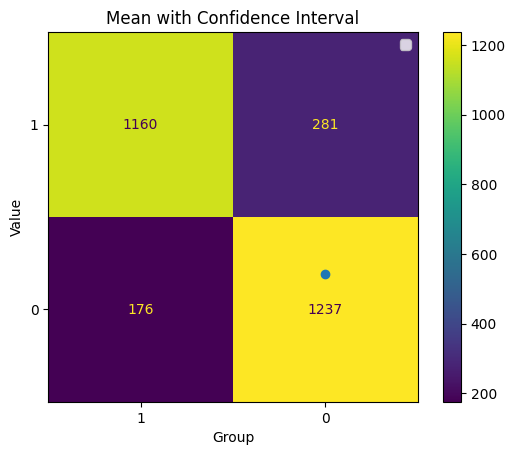


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



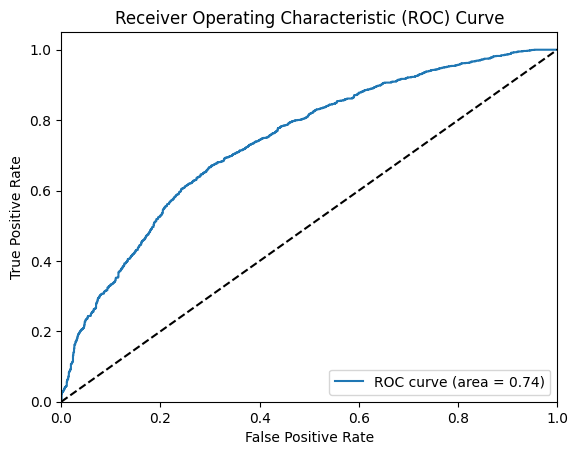

AUC Score: 0.7387125497204751


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6643356643356644, 0.6328671328671329, 0.6503496503496503, 0.6818181818181818, 0.6771929824561403, 0.7192982456140351, 0.6526315789473685, 0.6350877192982456, 0.6526315789473685, 0.6210526315789474]
Mean accuracy: 0.6587265366212735
95% confidence interval: (0.6382613787373942, 0.6791916945051527)


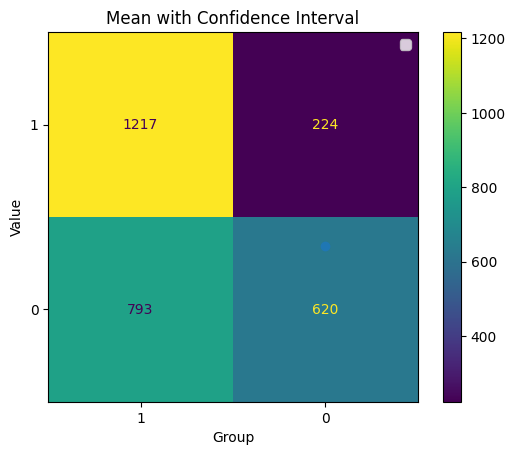


ORIGINAL VALUES RESTORED


In [4]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)  

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4212
Percentage of inconsistencies in age and married features: 44.28%
Number of inconsistencies in age and workType features: 4212
Percentage of inconsistencies in age and workType features: 44.28%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
88.56181665264928

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 9512
Percentage of inconsistencies in age and married features: 100.00%
Number of inconsistencies in age and workType features: 9512
Percentage of inconsistencies in age and workType features: 100.00%
Number of abnormal values: 9512
Percentage of abnormal values: 100.00%

TOTAL INCONSISTENCY PERCENTAGE
300.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
     

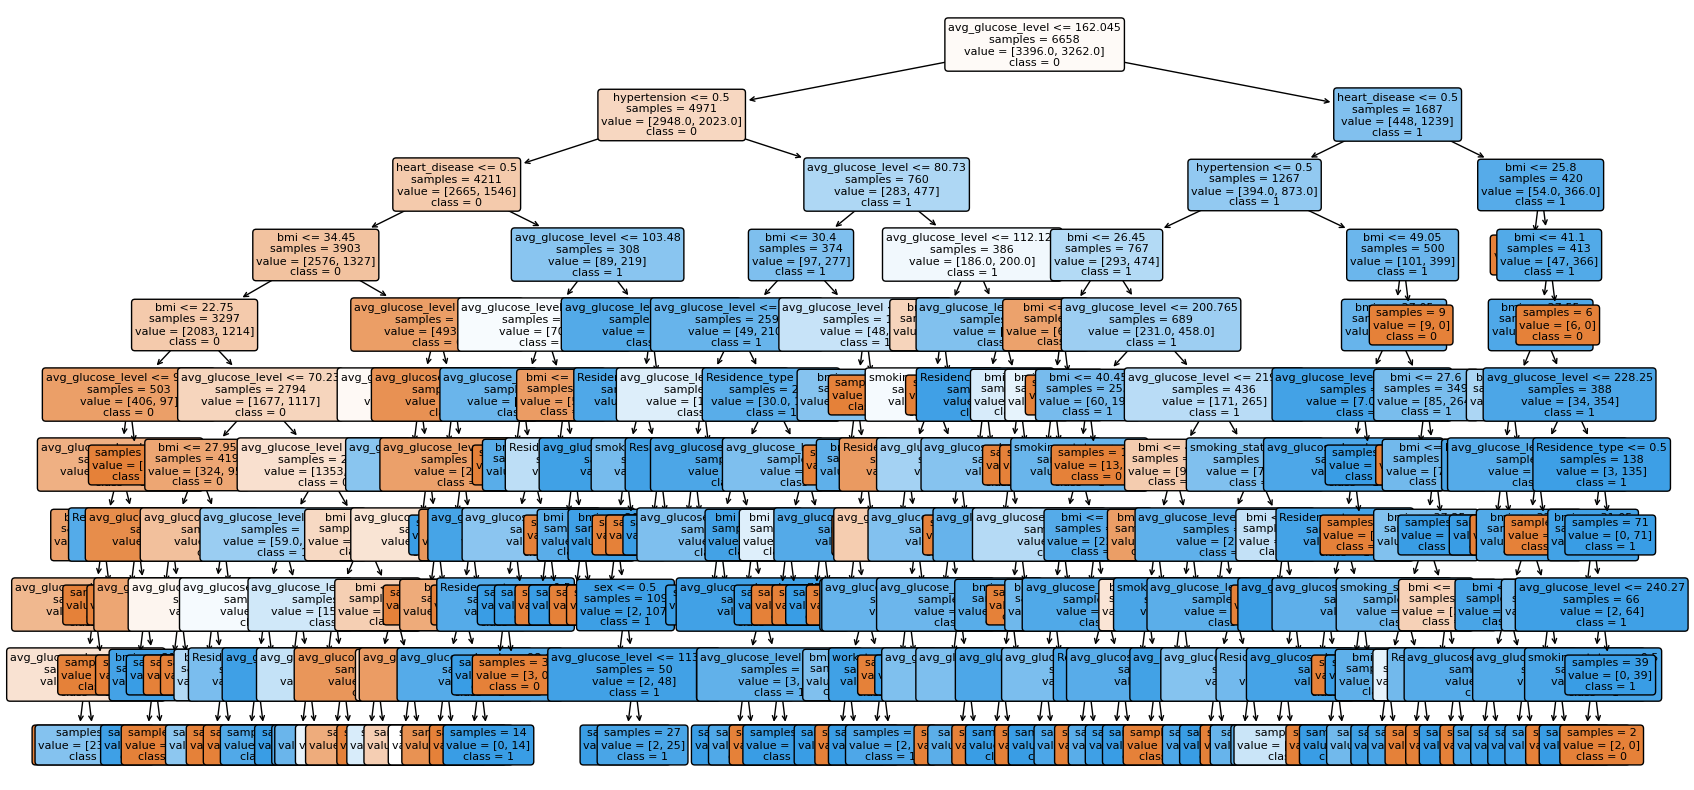

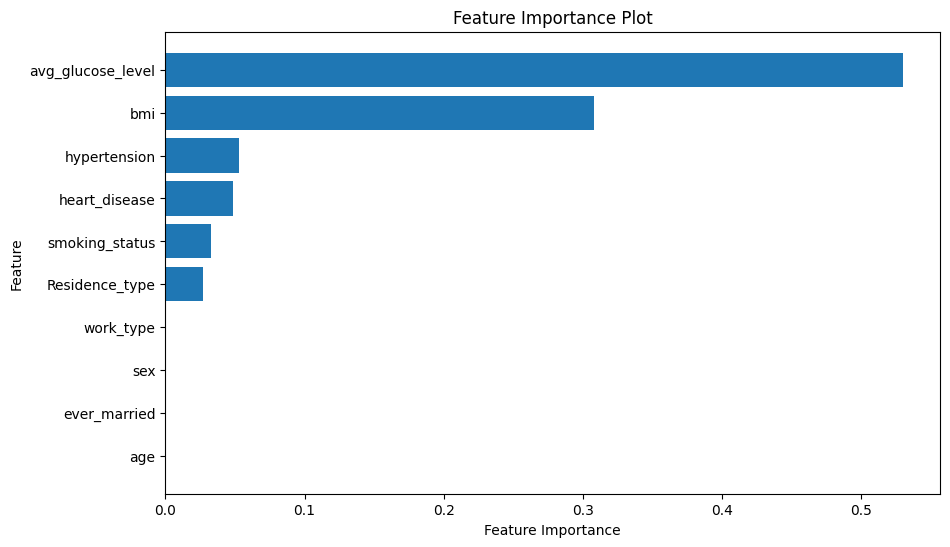

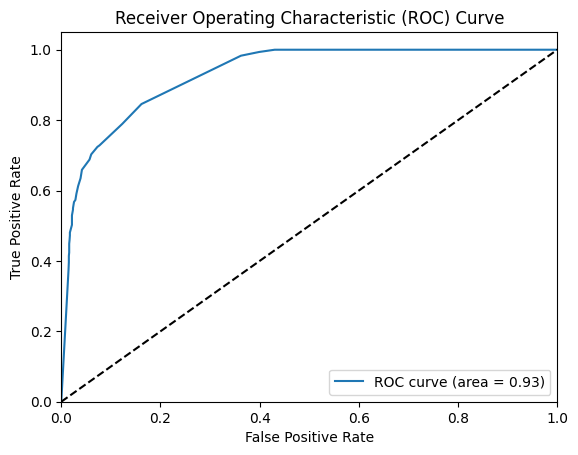

AUC Score: 0.9297027748187373
Accuracy for each fold: [0.8496503496503497, 0.8356643356643356, 0.7902097902097902, 0.8181818181818182, 0.8315789473684211, 0.8175438596491228, 0.7859649122807018, 0.7929824561403509, 0.7964912280701755, 0.8280701754385965]
Mean accuracy: 0.8146337872653664
95% confidence interval: (0.7988642742533328, 0.8304033002774)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


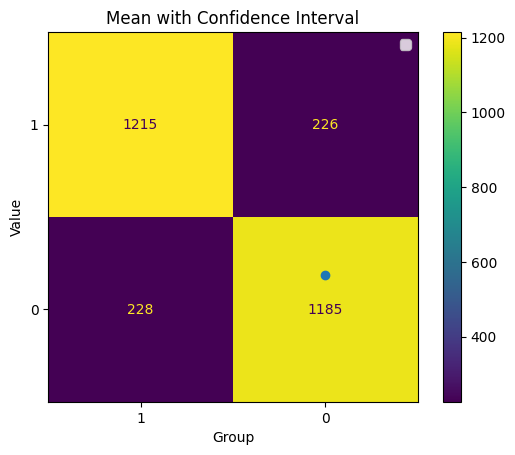


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



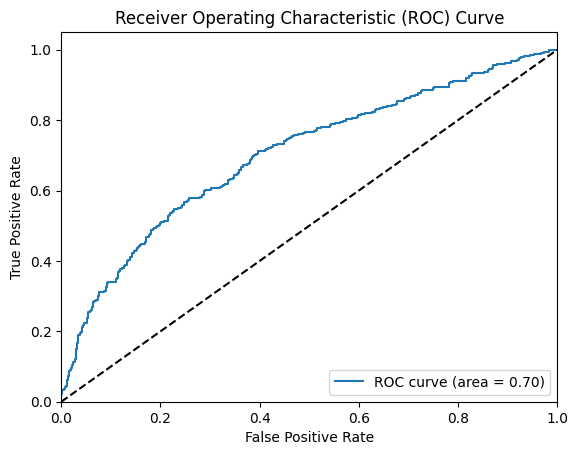

AUC Score: 0.7015882557770047


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6223776223776224, 0.6573426573426573, 0.6748251748251748, 0.6083916083916084, 0.656140350877193, 0.6701754385964912, 0.6771929824561403, 0.6807017543859649, 0.6947368421052632, 0.656140350877193]
Mean accuracy: 0.6598024782235309
95% confidence interval: (0.6407718491429127, 0.678833107304149)


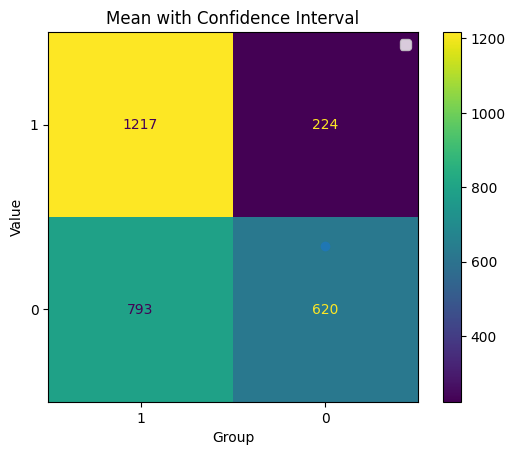


ORIGINAL VALUES RESTORED


In [5]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1441
           1       0.84      0.84      0.84      1413

    accuracy                           0.84      2854
   macro avg       0.84      0.84      0.84      2854
weighted avg       0.84      0.84      0.84      2854

Node Labels:
 Annotation(0.626258, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


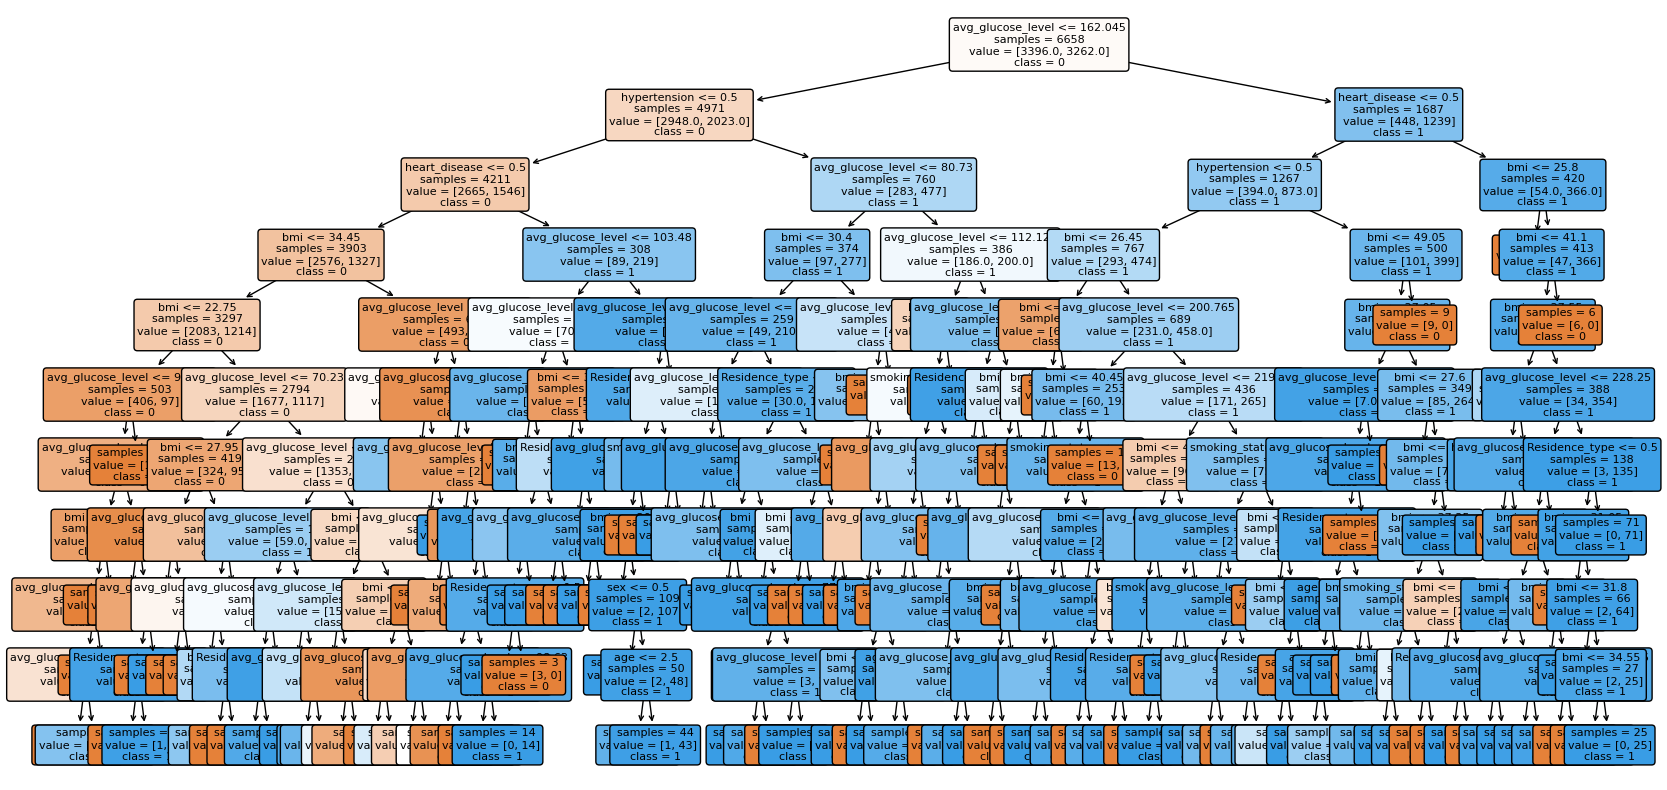

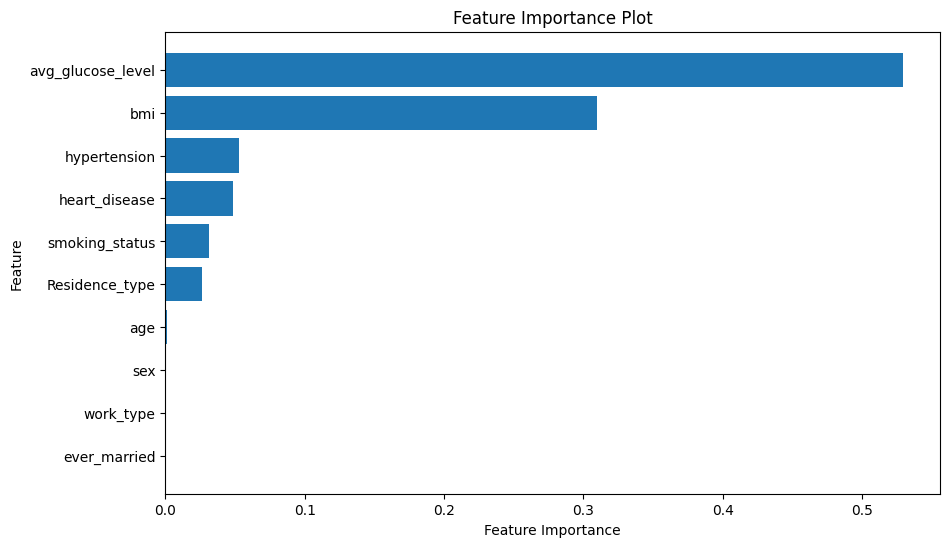

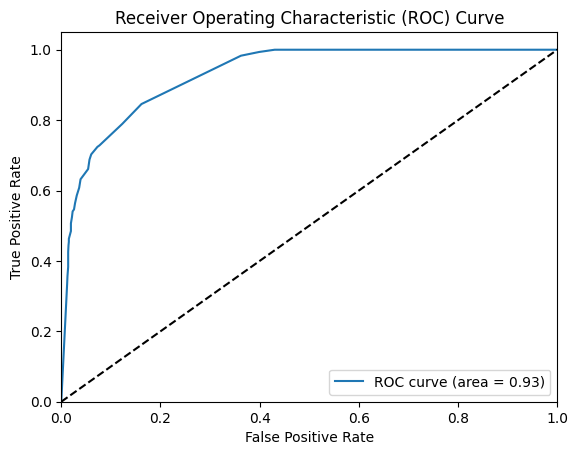

AUC Score: 0.9296101973692288


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7657342657342657, 0.7972027972027972, 0.8111888111888111, 0.7937062937062938, 0.8175438596491228, 0.8807017543859649, 0.7964912280701755, 0.8140350877192982, 0.8105263157894737, 0.8491228070175438]
Mean accuracy: 0.8136253220463747
95% confidence interval: (0.7909485458027892, 0.8363020982899603)


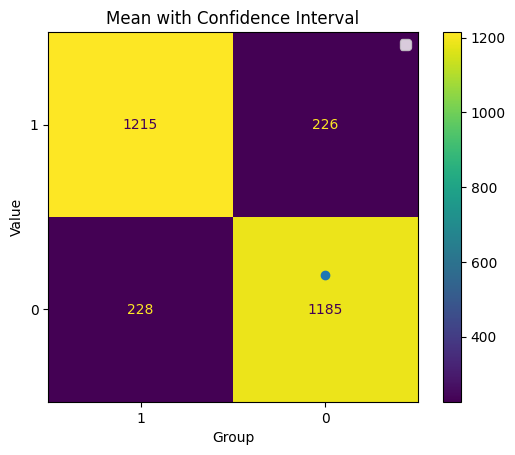


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



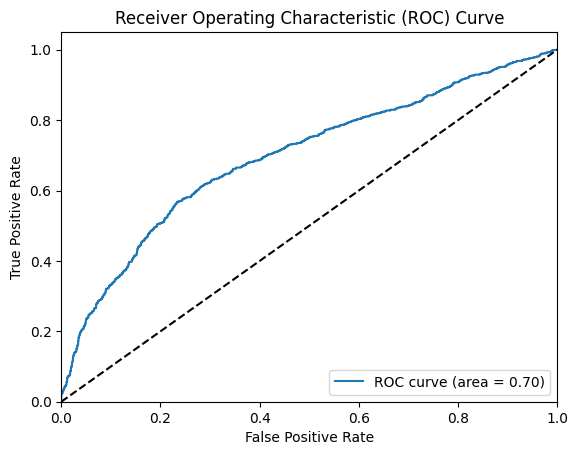

AUC Score: 0.6963852557765137


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6328671328671329, 0.7272727272727273, 0.6958041958041958, 0.7202797202797203, 0.6456140350877193, 0.6526315789473685, 0.6631578947368421, 0.6982456140350877, 0.6210526315789474, 0.5964912280701754]
Mean accuracy: 0.6653416758679918
95% confidence interval: (0.6340905271364801, 0.6965928245995034)


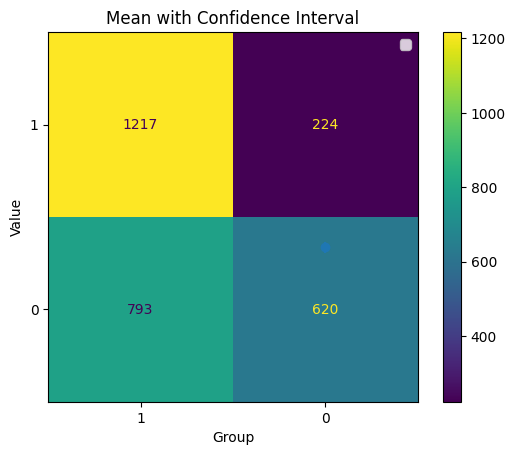

In [6]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 
